In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

In [2]:
columns=['CreditScore', 'Geography',
    'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
    'IsActiveMember', 'EstimatedSalary','Exited']

In [3]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
data=data[columns]
test=test[columns]

# Analyze Data

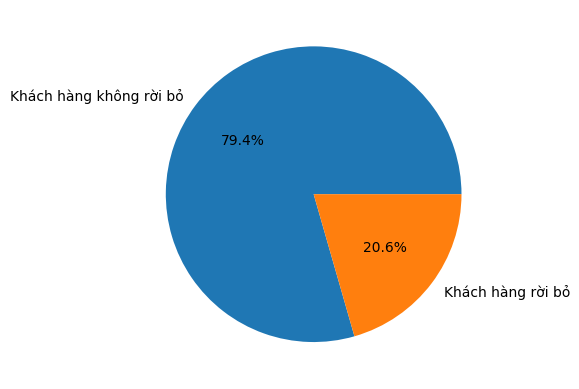

In [5]:
plt.pie(data["Exited"].value_counts(), labels=["Khách hàng không rời bỏ","Khách hàng rời bỏ"],autopct="%.01f%%")
plt.show()

<Axes: xlabel='NumOfProducts', ylabel='count'>

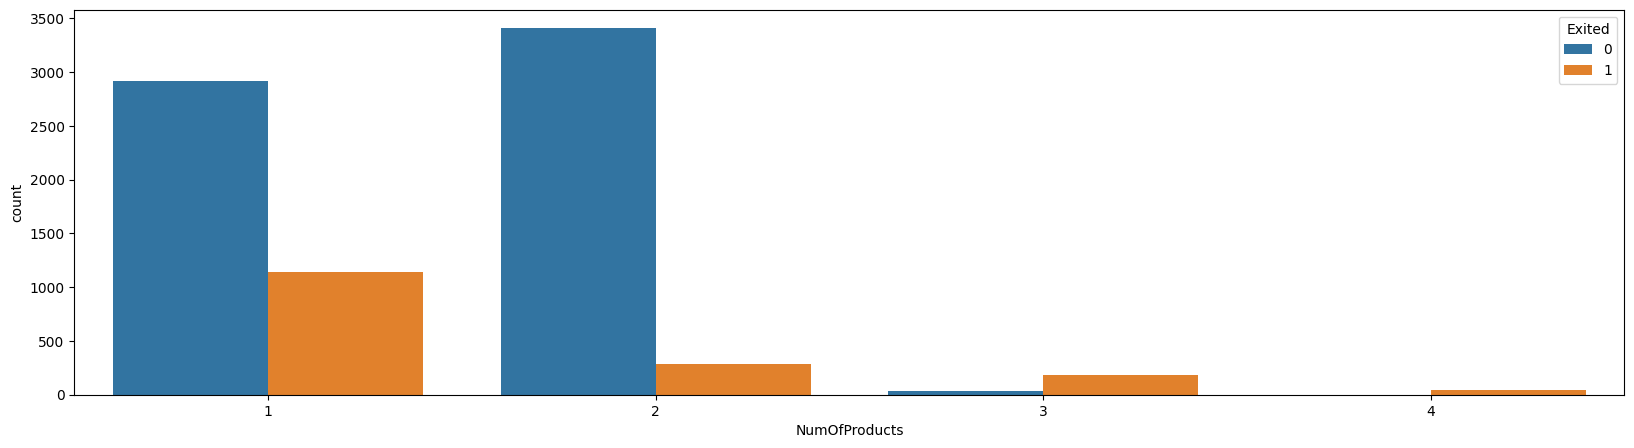

In [6]:
plt.figure(figsize=(20,5))
sns.countplot(data=data, x="NumOfProducts", hue="Exited")

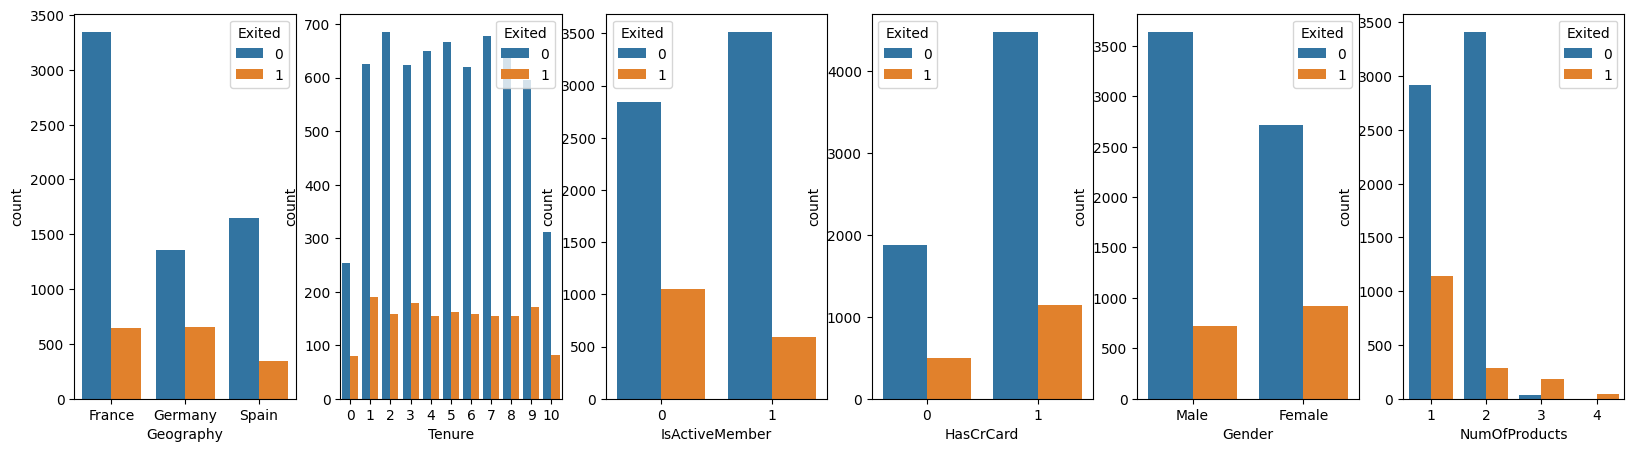

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(1, 6, 1)
sns.countplot(data=data, x="Geography", hue="Exited")

plt.subplot(1, 6, 2)
sns.countplot(data=data, x="Tenure", hue="Exited")

plt.subplot(1, 6, 3)
sns.countplot(data=data, x="IsActiveMember", hue="Exited")

plt.subplot(1, 6, 4)
sns.countplot(data=data, x="HasCrCard", hue="Exited")

plt.subplot(1, 6, 5)
sns.countplot(data=data, x="Gender", hue="Exited")

plt.subplot(1, 6, 6)
sns.countplot(data=data, x="NumOfProducts", hue="Exited")
plt.show()

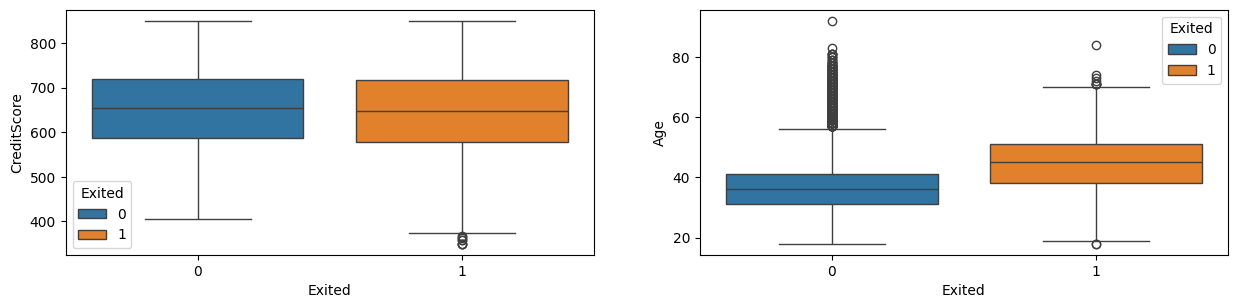

In [8]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=data["CreditScore"],x=data["Exited"],hue=data["Exited"])
plt.subplot(2,2,2)
sns.boxplot(y=data["Age"],x=data["Exited"],hue=data["Exited"])
plt.show()

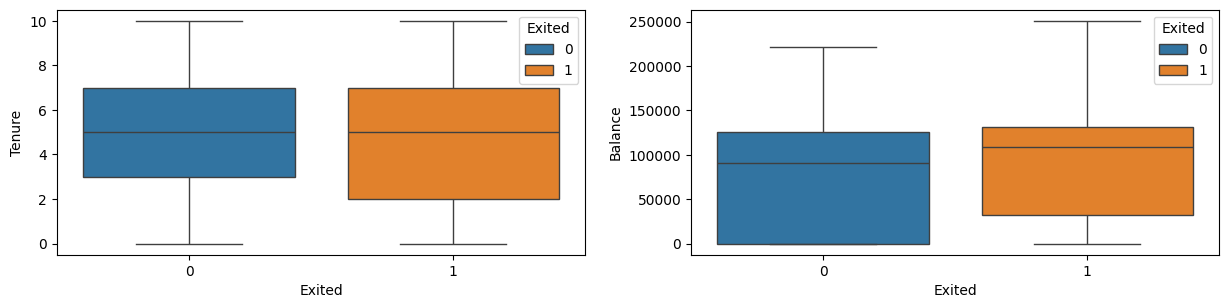

In [9]:

plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=data["Tenure"],x=data["Exited"],hue=data["Exited"])
plt.subplot(2,2,2)
sns.boxplot(y=data["Balance"],x=data["Exited"],hue=data["Exited"])
plt.show()
     

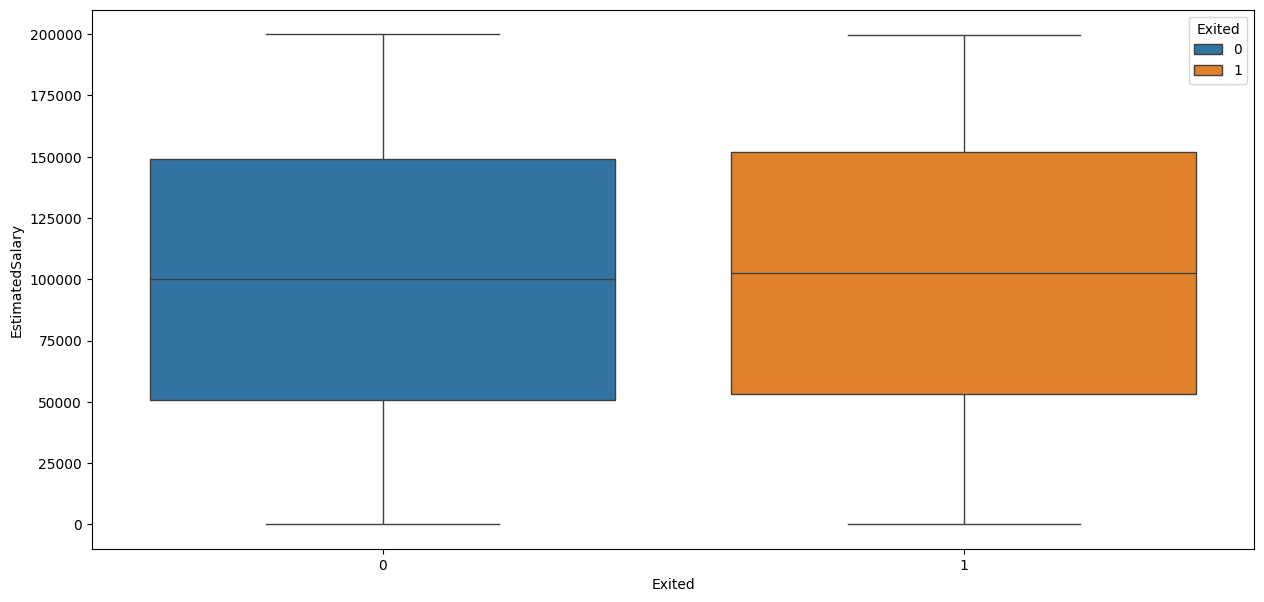

In [10]:
plt.figure(figsize=(15,7))

sns.boxplot(y=data["EstimatedSalary"],x=data["Exited"],hue=data["Exited"])
plt.show()

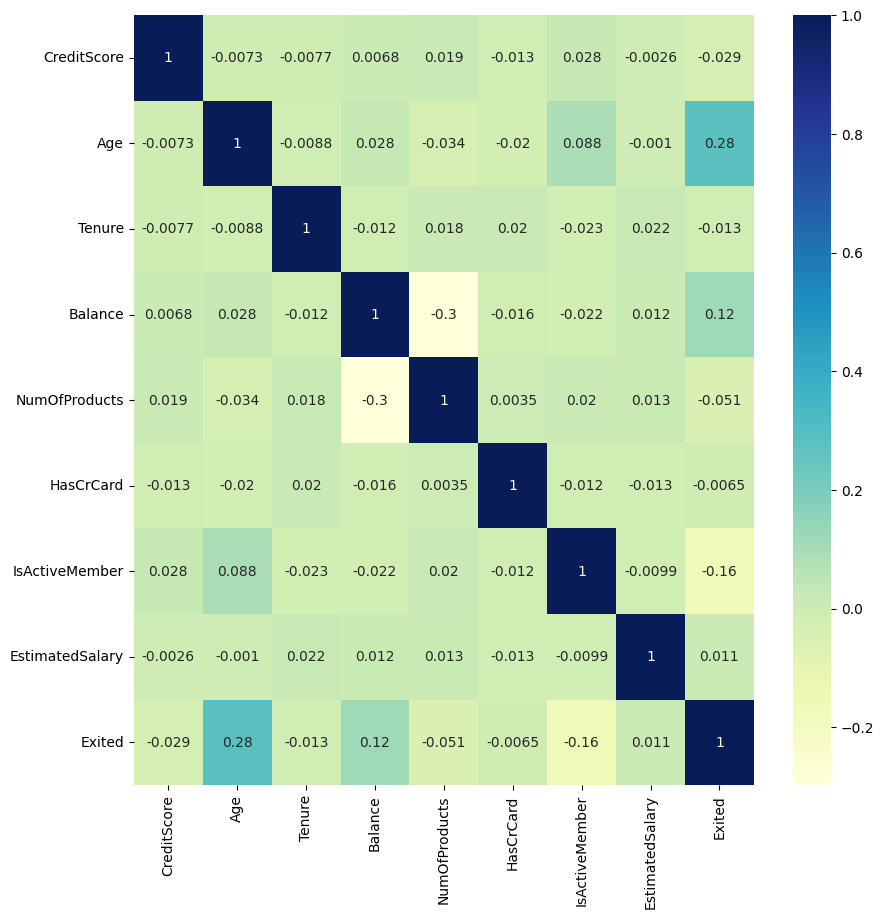

In [11]:
numeric_df = data.select_dtypes(include=[np.number])
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu",ax=ax, annot=True)
plt.show()

# PREPROCESSING

In [12]:
x_train=data.drop("Exited",axis=1)
y_train=data["Exited"]
x_test=test.drop("Exited",axis=1)
y_test=test["Exited"]

In [13]:
x_train=pd.get_dummies(x_train,drop_first=True)
x_test=pd.get_dummies(x_test,drop_first=True)

## Xử lý imbalance 

In [14]:

sm=SMOTE(random_state=42,sampling_strategy=0.7)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [15]:
y_train.value_counts()

Exited
0    6356
1    4449
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def Scaler(x_train,data_test):
  col=["CreditScore","Balance","EstimatedSalary","Age","Tenure","NumOfProducts"]
#  col=["Age","Balance","NumOfProducts"]
  scaler = StandardScaler()
  scale=scaler.fit(x_train[col])
  x_train[col]=scale.transform(x_train[col])
  data_test[col]=scale.transform(data_test[col])
  return x_train,data_test
x_train,x_test=Scaler(x_train,x_test)

# Training

## BASE TRAIN

In [17]:
def reported(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")

In [18]:


svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [19]:
reported(y_test,svc.predict(x_test))

Accuracy: 0.842
Precision: 0.8454593287978411
Recall: 0.842
F1 Score: 0.843606503883471


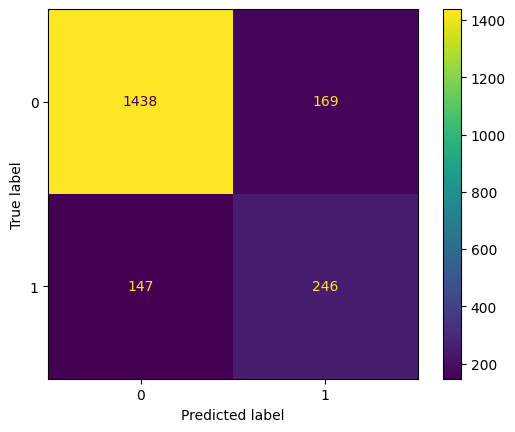

In [20]:
ConfusionMatrixDisplay.from_estimator(svc,x_test,y_test)


In [21]:

GBC = xgb.XGBClassifier()
GBC.fit(x_train,y_train)
GBC.score(x_test,y_test)


0.8455

In [22]:
reported(y_test,GBC.predict(x_test))

Accuracy: 0.8455
Precision: 0.8480987651480288
Recall: 0.8455
F1 Score: 0.84672465391161


In [23]:
report = classification_report(y_test, GBC.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.63      0.62       393

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8495

In [25]:
reported(y_test,rf.predict(x_test))

Accuracy: 0.8495
Precision: 0.8482206837871287
Recall: 0.8495
F1 Score: 0.8488385086917509


## Tìm bộ tham số tối ưu cho các mô hình

In [26]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [1000,2000], 
    'max_depth': [None, 5, 10, 20],  
    'min_samples_split': [2, 5, 10], 
}

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# In kết quả
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 1000}
Best Score: 0.8548819990745026


In [28]:
rf=clf1=RandomForestClassifier(max_depth=20,min_samples_split=2,n_estimators=1000)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000)

In [29]:
report = classification_report(y_test, rf.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1607
           1       0.63      0.61      0.62       393

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
svc = SVC()


param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']  
}

grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(x_train, y_train)

# In kết quả
print("Best Parameters:", grid_search_svc.best_params_)
print("Best Score:", grid_search_svc.best_score_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8343359555761222


In [31]:
svc=SVC(C=10,gamma="scale",kernel='rbf')
svc.fit(x_train,y_train)

SVC(C=10)

In [32]:
report = classification_report(y_test, svc.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.58      0.63      0.60       393

    accuracy                           0.84      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:

xgboost = xgb.XGBClassifier()


param_grid = {
    'n_estimators': [ 50,100,200],
    'max_depth': [3, 5, 7, 9], 
    'learning_rate': [0.01, 0.1, 0.2, 0.5],  
    'subsample': [0.8, 1.0]  
}

grid_search_xgb = GridSearchCV(xgboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# In kết quả
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.8593243868579362


In [34]:
xgboost=xgb.XGBClassifier(learning_rate=0.1,max_depth=9,n_estimators=200,subsample=0.8)
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
reported(y_test,xgboost.predict(x_test))

Accuracy: 0.8515
Precision: 0.8522206522625613
Recall: 0.8515
F1 Score: 0.8518536523581158


''

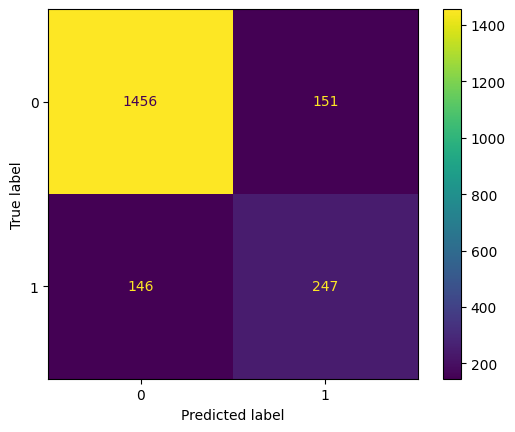

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgboost,x_test,y_test)


In [36]:
report = classification_report(y_test, xgboost.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.62      0.63      0.62       393

    accuracy                           0.85      2000
   macro avg       0.76      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



In [37]:
clf1=RandomForestClassifier(max_depth=20,min_samples_split=2,n_estimators=1000)
clf2=SVC(C=10,gamma="scale",kernel='rbf')
clf3=xgb.XGBClassifier(learning_rate=0.1,max_depth=9,n_estimators=500,subsample=0.8)

In [38]:
vt=VotingClassifier(estimators=[ ('rf', clf1), ('svc', clf2), ('xgb', clf3)],voting="hard",weights=[2,1,3],verbose=1)
vt.fit(x_train,y_train)

[Voting] ....................... (1 of 3) Processing rf, total=  10.6s
[Voting] ...................... (2 of 3) Processing svc, total=   2.4s
[Voting] ...................... (3 of 3) Processing xgb, total=   0.8s


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=1000)),
                             ('svc', SVC(C=10)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=Non...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 verbose=1, weights=[2, 1, 3])

In [39]:
vt.score(x_test,y_test)

0.857

In [40]:
reported(y_test,vt.predict(x_test))

Accuracy: 0.857
Precision: 0.8509341181769716
Recall: 0.857
F1 Score: 0.8532379449062233


In [41]:
report = classification_report(y_test, vt.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.66      0.57      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000



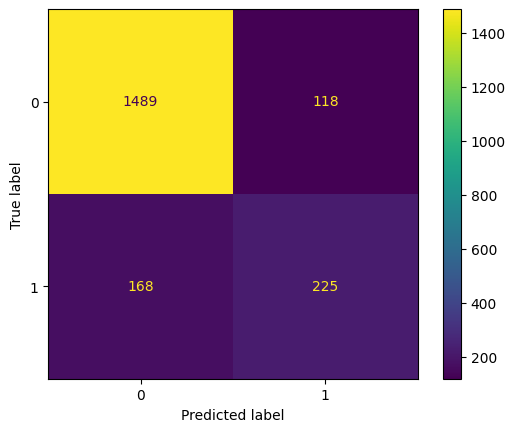

In [44]:
ConfusionMatrixDisplay.from_estimator(vt,x_test,y_test)


In [42]:
import joblib

# Lưu mô hình vào file
# joblib.dump(vt, 'voting_model.pkl')
# joblib.dump(xgboost,'xgb_model.pkl')
